In [122]:
import pandas as pd 
import numpy as np

In [123]:
print(pd.__version__)
print(np.__version__)

1.1.5
1.18.1


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

In [126]:
df = pd.read_csv('iris.csv')

In [127]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [128]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [129]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [130]:
df.shape

(150, 5)

In [131]:
print(df.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


# DATA VISUALISASI

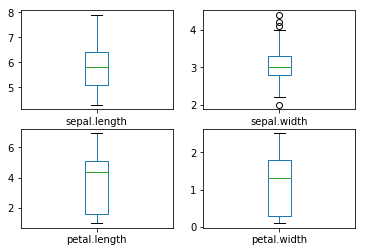

In [132]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

plt.show()

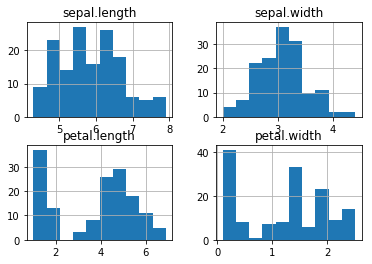

In [133]:
df.hist()
plt.show()

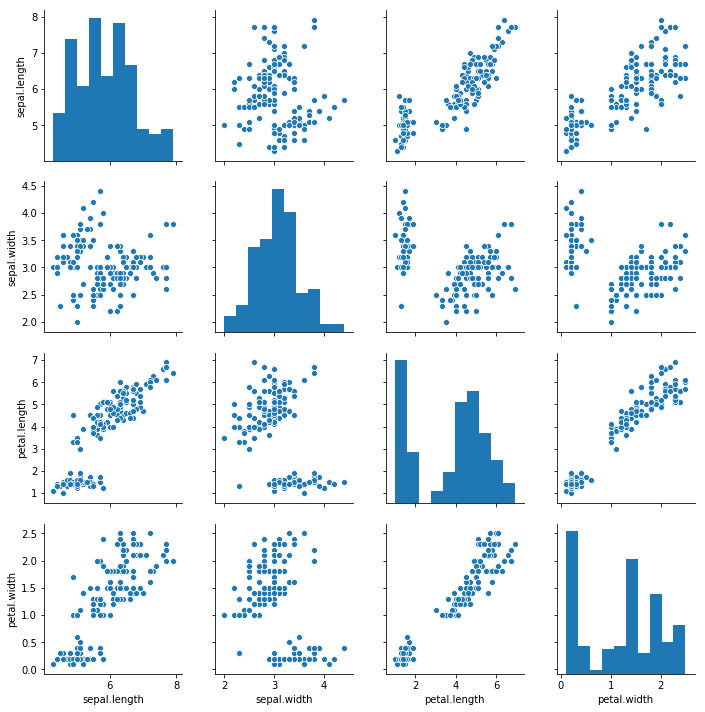

In [134]:
sns.pairplot(df)

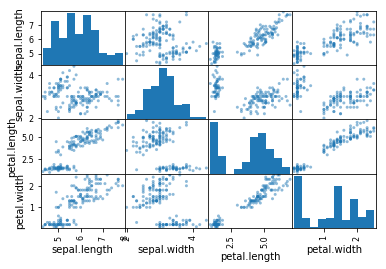

In [135]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df)
plt.show()

In [136]:
array = df.values
X = array[:,0:4]
Y = array[:,4]

In [137]:

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [138]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs', max_iter=1000)

In [139]:
logit.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [140]:
print("Akurasi : ", logit.score(X_validation,Y_validation))

Akurasi :  0.8666666666666667


In [141]:
logit.predict(X_validation)

array(['Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica'],
      dtype=object)

In [142]:
mysample = np.array([4.9, 3.0, 1.4, 0.2])
ex1 = mysample.reshape(1, -1)

In [143]:
logit.predict(ex1)

array(['Setosa'], dtype=object)

In [144]:
import sklearn.externals
import joblib
joblib.dump(logit, 'logit_model_iris.pkl')

['logit_model_iris.pkl']

In [145]:
logit_model = joblib.load('logit_model_iris.pkl')

In [146]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [147]:
ex2 = np.array([6.2, 3.4, 5.4, 2.3]).reshape(1, -1)

In [148]:
logit_model.predict(ex2)

array(['Virginica'], dtype=object)

In [149]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [150]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC()

In [151]:
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

accuracy : 0.9


In [154]:
joblib.dump(knn, 'kkn_model_iris.pkl')

['kkn_model_iris.pkl']

In [152]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))

accuracy : 0.9


In [157]:
joblib.dump(dtree, 'dtree_model_iris.pkl')

['dtree_model_iris.pkl']

In [158]:
svm.fit(X_train, Y_train)
print("accuracy : ", svm.score(X_validation, Y_validation))

accuracy :  0.8666666666666667


In [159]:
joblib.dump(svm, 'svm_model_iris.pkl')

['svm_model_iris.pkl']